Import the MicroGP package (first install it: ``!pip install microgp``)


In [1]:
import microgp as ugp
ugp.logging.DefaultLogger.setLevel(level=ugp.logging.INFO)

M:\LuBa\Documenti\GitHub\microgp4\src\microgp\__init__.py:51: UserWarning: Paranoia checks are active: performances can be significantly impaired (consider using '-O')
  warnings.warn(WARN_DBG, UserWarning)
11:40:34 INFO Initialized random generator


### Creation of the individuals structure
Define a parameter of type ugp.parameter.Categorical that can take two values: 0 or 1

In [3]:
bit = ugp.make_parameter(ugp.parameter.Categorical, alternatives=[0, 1])

Define a macro that contains a parameter of type ugp.parameter.Categorical

In [4]:
word_macro = ugp.Macro("{bit}", {'bit': bit})

Create a section containing 8 macros

In [5]:
word_section = ugp.make_section(word_macro, size=(8, 8), name='word_sec')

Create the instruction library

In [6]:
library = ugp.Constraints()

Define the sections in the library

In [7]:
library['main'] = ["Bitstring:", word_section]

### Define the evaluator method and the fitness type

In [8]:
def evaluator_function(data: str):
    count = data.count('1')
    return list(str(count))

library.evaluator = ugp.fitness.make_evaluator(evaluator=evaluator_function, fitness_type=ugp.fitness.Lexicographic)

### Create a list of operators with their aritiy

In [14]:
operators = ugp.Operators()

Add initialization operators

In [15]:
operators += ugp.GenOperator(ugp.create_random_individual, 0)

Add mutation operators

In [16]:
operators += ugp.GenOperator(ugp.hierarchical_mutation, 1)
operators += ugp.GenOperator(ugp.flat_mutation, 1)

Add crossover operators

In [17]:
operators += ugp.GenOperator(ugp.macro_pool_one_cut_point_crossover, 2)
operators += ugp.GenOperator(ugp.macro_pool_uniform_crossover, 2)

Create the object that will manage the evolution

In [18]:
mu = 10
nu = 20
sigma = 0.7
lambda_ = 7
max_age = 10

darwin = ugp.Darwin(
    constraints=library,
    operators=operators,
    mu=mu,
    nu=nu,
    lambda_=lambda_,
    sigma=sigma,
    max_age=max_age,
)

Evolve (create random individuals and use selected genetic operators to evolve them)

In [19]:
darwin.evolve()

Print best individuals, and their graph

16:21:11 These are the best ever individuals:
16:21:11 Bitstring:
16:21:11 1
16:21:11 1
16:21:11 1
16:21:11 1
16:21:11 1
16:21:11 1
16:21:11 1
16:21:11 1


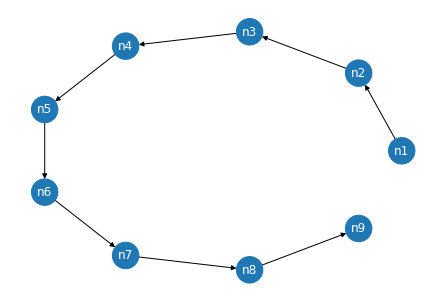

16:21:12 Fitness score: Lexicographic(8)



In [14]:
ugp.print_individual(darwin.archive.individuals,
                     msg="These are the best ever individuals:",
                     plot=True, score=True)